# Setup 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

In [311]:
X, y = datasets.make_blobs(random_state = 10) 

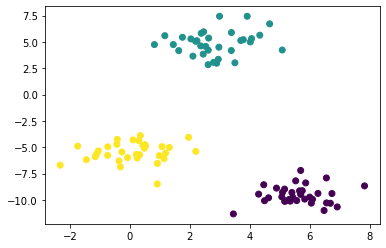

In [313]:
#this is an unsupervised algorithm, we dont really need to show the clusters' y value, but just for clarity
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

# K-Means 

Centroids updated after getting all values closest to them, repeated until convergence.

In [415]:
random.seed(12)

In [416]:
c = 3
random_init = [random.choice(range(len(X))),random.choice(range(len(X))),random.choice(range(len(X)))]
centroids = [X[random_init[0],:],
             X[random_init[1],:],
             X[random_init[2],:]]
n_iter = 100

In [417]:
centroids

[array([2.98771848, 7.44372871]),
 array([-0.43558928, -4.7222919 ]),
 array([-0.74265919, -5.76492657])]

In [418]:
def euclidean(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[0] - p2[1])**2) 

In [419]:
cluster_elements = {
                0:[random_init[0]],
                1:[random_init[1]],
                2:[random_init[2]]}

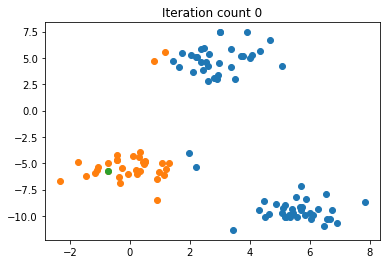

[[4.263493276484668, -2.5953057559563595], [0.009974043937342577, -4.860420509105687], [-0.7426591907752509, -5.764926567937222]]


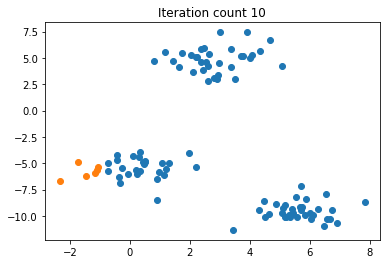

[[3.1546627558539995, -3.295937719154464], [-1.472294658531464, -5.7730633203842805], [nan, nan]]


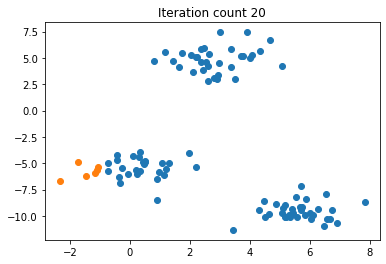

[[3.1546627558539995, -3.295937719154464], [-1.472294658531464, -5.7730633203842805], [nan, nan]]


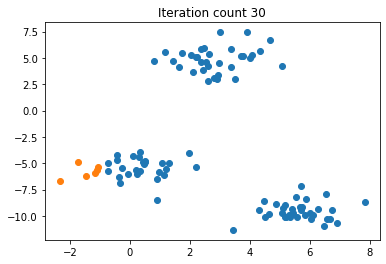

[[3.1546627558539995, -3.295937719154464], [-1.472294658531464, -5.7730633203842805], [nan, nan]]


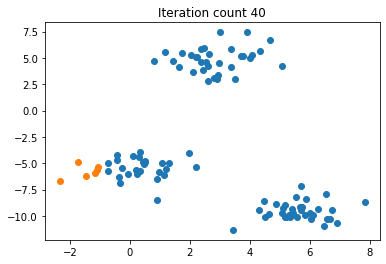

[[3.1546627558539995, -3.295937719154464], [-1.472294658531464, -5.7730633203842805], [nan, nan]]


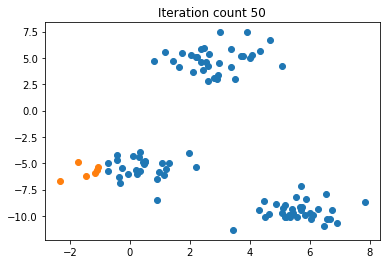

[[3.1546627558539995, -3.295937719154464], [-1.472294658531464, -5.7730633203842805], [nan, nan]]


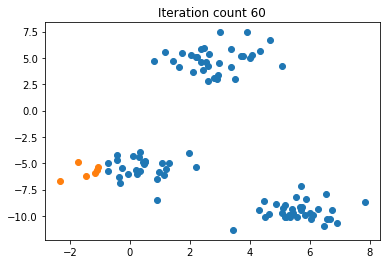

[[3.1546627558539995, -3.295937719154464], [-1.472294658531464, -5.7730633203842805], [nan, nan]]


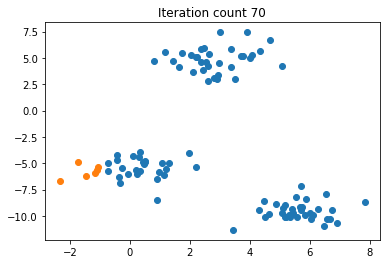

[[3.1546627558539995, -3.295937719154464], [-1.472294658531464, -5.7730633203842805], [nan, nan]]


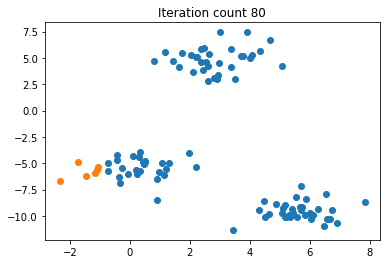

[[3.1546627558539995, -3.295937719154464], [-1.472294658531464, -5.7730633203842805], [nan, nan]]


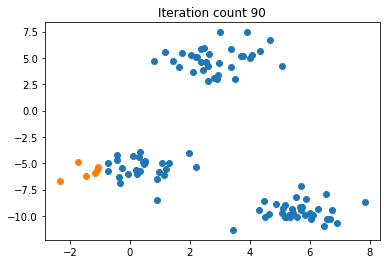

[[3.1546627558539995, -3.295937719154464], [-1.472294658531464, -5.7730633203842805], [nan, nan]]


In [420]:
for iter_count in range(n_iter):
    
    #check all points
    for i in range(len(X)):
        #look for min value and cluster
        min_distance = np.inf
        cent_idx = -1

        #for every element check the distance to all existing centroids
        for k in range(c):
            distance = euclidean(X[i], centroids[k])
            if distance < min_distance:
                cent_idx = k
                min_distance = distance

        #assigns element index to its closest centroid
        cluster_elements.get(cent_idx).append(i)

    #recalculate centroid
    centroids[0] = [np.mean(X[cluster_elements.get(0),0]), np.mean(X[cluster_elements.get(0),1])]
    centroids[1] = [np.mean(X[cluster_elements.get(1),0]), np.mean(X[cluster_elements.get(1),1])]
    centroids[2] = [np.mean(X[cluster_elements.get(2),0]), np.mean(X[cluster_elements.get(2),1])]
    
    #viz
    if iter_count %10 == 0:
        plt.scatter(X[cluster_elements.get(0),0],X[cluster_elements.get(0),1])
        plt.scatter(X[cluster_elements.get(1),0],X[cluster_elements.get(1),1])
        plt.scatter(X[cluster_elements.get(2),0],X[cluster_elements.get(2),1])
        plt.title(f"Iteration count {iter_count}")
        plt.show()
        print(centroids)
    
    #reset points to clusters
    cluster_elements = {
                0:[],
                1:[],
                2:[]}